In [1]:
##############

import sys
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import csv
import io
import matplotlib.colors as colors
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
import astropy
from astropy import stats
import itertools
import os

###############

np.set_printoptions(suppress=True)
os.chdir("../data")  # moves working directory to data folder

In [4]:
#AG

bkg_cut_foils = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00011036,
       0.00022073, 0.00033109, 0.00099327, 0.00253835, 0.00794614,
       0.0215208 , 0.04370379, 0.08332414, 0.14082331, 0.21101424,
       0.29599382, 0.38693301, 0.48559762, 0.59143582, 0.69285951,
       0.78070853, 0.85542435, 0.91159916, 0.94956407, 0.96965015,
       0.9835559 , 0.99150204, 0.99448185, 0.99602693, 0.99757201,
       0.99812383, 0.99889637, 0.99889637, 0.99900673, 0.9991171 ,
       0.99922746, 0.99944818, 0.99966891, 0.99977927, 0.99988964,
       0.99988964, 0.99988964, 0.99988964, 0.99988964, 0.99988964])
sig_cut_foils = np.array([0.    , 0.0002, 0.0012, 0.006 , 0.0192, 0.0445, 0.0842, 0.1347,
       0.1884, 0.2396, 0.2827, 0.3172, 0.3444, 0.3632, 0.3768, 0.3857,
       0.3918, 0.3987, 0.4045, 0.4102, 0.4216, 0.437 , 0.4596, 0.4894,
       0.5315, 0.585 , 0.6462, 0.7134, 0.7743, 0.832 , 0.8783, 0.918 ,
       0.9438, 0.9662, 0.9803, 0.9877, 0.9935, 0.9963, 0.9979, 0.9988,
       0.9991, 0.9997, 0.9998, 0.9999, 0.9999, 0.9999, 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])

sig_cut_bs = np.array([0.    , 0.0006, 0.001 , 0.0027, 0.007 , 0.016 , 0.027 , 0.0458,
       0.075 , 0.117 , 0.1684, 0.2251, 0.2817, 0.3284, 0.3668, 0.3884,
       0.4044, 0.4137, 0.4254, 0.4374, 0.4531, 0.4695, 0.4925, 0.519 ,
       0.5524, 0.5933, 0.6435, 0.7006, 0.763 , 0.8247, 0.8719, 0.9133,
       0.9438, 0.9626, 0.9738, 0.9823, 0.9872, 0.9905, 0.9927, 0.9955,
       0.9964, 0.9974, 0.9979, 0.9988, 0.999 , 0.9992, 0.9995, 0.9995,
       0.9995, 0.9997, 0.9997, 0.9997, 0.9999, 0.9999, 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])
bkg_cut_bs = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00001111, 0.00001111, 0.00002222, 0.00004445,
       0.00008889, 0.00014445, 0.00021112, 0.00041112, 0.00078892,
       0.00123337, 0.00230008, 0.00418903, 0.00734469, 0.01194484,
       0.01994511, 0.03224552, 0.04996833, 0.0744247 , 0.10805916,
       0.15191617, 0.20790693, 0.28043157, 0.3647566 , 0.45810416,
       0.54699601, 0.63053213, 0.70737913, 0.77475916, 0.83026101,
       0.87365134, 0.90405236, 0.92436415, 0.93898686, 0.94954276,
       0.95885418, 0.96658778, 0.97249908, 0.97765481, 0.98191051,
       0.98569952, 0.98874407, 0.99146638, 0.99366646, 0.99521095,
       0.99669989, 0.99768881, 0.99836661, 0.99889996, 0.99929998,
       0.99955554, 0.99974444, 0.99982222, 0.99988889, 0.99995555])

sig_cut_xe = np.array([0.    , 0.    , 0.    , 0.0006, 0.0016, 0.0037, 0.0099, 0.0249,
       0.0523, 0.1019, 0.1637, 0.2266, 0.277 , 0.3164, 0.342 , 0.3598,
       0.3738, 0.3831, 0.3885, 0.3923, 0.3946, 0.3967, 0.398 , 0.399 ,
       0.3998, 0.401 , 0.4038, 0.41  , 0.4184, 0.4424, 0.4773, 0.5471,
       0.6195, 0.6988, 0.7717, 0.8312, 0.8751, 0.9136, 0.9407, 0.9568,
       0.9684, 0.9798, 0.9859, 0.9908, 0.9938, 0.9961, 0.9977, 0.9986,
       0.999 , 0.9994, 0.9996, 0.9998, 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])
bkg_cut_xe = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00044395, 0.00199778, 0.00510544, 0.01509434,
       0.0409545 , 0.0963374 , 0.18335183, 0.29389567, 0.40255272,
       0.52008879, 0.63285239, 0.72475028, 0.79234184, 0.84561598,
       0.88368479, 0.92108768, 0.94139845, 0.96026637, 0.97258602,
       0.98146504, 0.98768036, 0.99256382, 0.99511654, 0.99733629,
       0.99833518, 0.99922309, 0.99955605, 0.99988901, 0.99988901,
       0.99988901, 0.99988901, 0.99988901, 1.        , 1.        ])

sig_cut_40 = np.array([0.    , 0.    , 0.    , 0.    , 0.0003, 0.0015, 0.0045, 0.0126,
       0.0322, 0.0702, 0.1168, 0.1793, 0.2341, 0.279 , 0.3191, 0.3462,
       0.363 , 0.3766, 0.3871, 0.3956, 0.4009, 0.4098, 0.4234, 0.4466,
       0.4818, 0.5311, 0.6023, 0.684 , 0.7717, 0.8494, 0.9099, 0.9512,
       0.9747, 0.9872, 0.9929, 0.9958, 0.9976, 0.9992, 0.9995, 0.9997,
       0.9997, 0.9998, 0.9998, 0.9999, 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])    #40% foils coverage

bkg_cut_40 = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00011049,
       0.00022097, 0.00044194, 0.00099437, 0.00364601, 0.01126947,
       0.02485913, 0.05491106, 0.10208817, 0.17246713, 0.25875594,
       0.36349575, 0.47729533, 0.59253121, 0.69693956, 0.79140426,
       0.86244614, 0.91470556, 0.94873495, 0.9705005 , 0.98143852,
       0.98862004, 0.99326041, 0.9955806 , 0.9970169 , 0.9977903 ,
       0.99856369, 0.99889515, 0.99933709, 0.99933709, 0.99933709,
       0.99944757, 0.99955806, 0.99955806, 0.99955806, 0.99966854,
       0.99966854, 0.99966854, 0.99977903, 0.99988951, 1.        ])

In [3]:
#AG and neutrons

sig_cut_foils = np.array([0.    , 0.0003, 0.0018, 0.0085, 0.0258, 0.0593, 0.1079, 0.1633,
       0.22  , 0.2692, 0.3093, 0.3399, 0.362 , 0.3746, 0.386 , 0.3926,
       0.4001, 0.4063, 0.4143, 0.4274, 0.4483, 0.4768, 0.5152, 0.5708,
       0.6366, 0.707 , 0.7732, 0.8348, 0.8842, 0.9237, 0.9519, 0.9729,
       0.984 , 0.9906, 0.9952, 0.9973, 0.9987, 0.999 , 0.9997, 0.9998,
       0.9999, 0.9999, 0.9999, 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])

bkg_cut_foils = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00002   , 0.00005   ,
       0.00006   , 0.00015   , 0.00024999, 0.00054998, 0.00138996,
       0.00287991, 0.00603982, 0.01209964, 0.02470926, 0.04449867,
       0.07806768, 0.12814622, 0.1968743 , 0.28651195, 0.39155951,
       0.50555734, 0.61910571, 0.72229485, 0.81094488, 0.8789658 ,
       0.92798758, 0.95906996, 0.97729252, 0.98845481, 0.99444671,
       0.9972381 , 0.99859893, 0.99927942, 0.99966967, 0.99984981,
       0.99991987, 0.99997991, 0.99998993, 0.99998995, 0.99998996,
       0.99999997, 0.99999998, 0.99999998, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ])

bkg_cut_bs = np.array([0.        , 0.00014   , 0.00014   , 0.00014   , 0.00024999,
       0.00051998, 0.00084997, 0.00106997, 0.00158995, 0.00214994,
       0.00314991, 0.00403988, 0.00664981, 0.00963972, 0.01296963,
       0.01857948, 0.02641928, 0.03624904, 0.04948874, 0.06699835,
       0.0898779 , 0.11953738, 0.15640681, 0.20492608, 0.26290535,
       0.33348455, 0.41839369, 0.50899314, 0.60614276, 0.70336264,
       0.78314292, 0.85236335, 0.90112419, 0.93555518, 0.95844615,
       0.97417698, 0.98296763, 0.98917806, 0.99253839, 0.99549862,
       0.99659887, 0.99762907, 0.99835922, 0.99888936, 0.99916948,
       0.99940959, 0.99955968, 0.99968975, 0.99976982, 0.99981986,
       0.9998799 , 0.99991993, 0.99996995, 0.99996997, 0.99996998,
       0.99996999, 0.99996999, 0.99998   , 1.        , 1.        ])

sig_cut_bs = np.array([0.    , 0.0006, 0.001 , 0.0027, 0.007 , 0.016 , 0.027 , 0.0458,
       0.075 , 0.117 , 0.1684, 0.2251, 0.2817, 0.3284, 0.3668, 0.3884,
       0.4044, 0.4137, 0.4254, 0.4374, 0.4531, 0.4695, 0.4925, 0.519 ,
       0.5524, 0.5933, 0.6435, 0.7006, 0.763 , 0.8247, 0.8719, 0.9133,
       0.9438, 0.9626, 0.9738, 0.9823, 0.9872, 0.9905, 0.9927, 0.9955,
       0.9964, 0.9974, 0.9979, 0.9988, 0.999 , 0.9992, 0.9995, 0.9995,
       0.9995, 0.9997, 0.9997, 0.9997, 0.9999, 0.9999, 1.    , 1.    ,
       1.    , 1.    , 1.    , 1.    ])

sig_cut_xe = np.array([0.    , 0.0003, 0.0027, 0.0095, 0.0265, 0.0544, 0.0935, 0.1375,
       0.1748, 0.212 , 0.2473, 0.2744, 0.2987, 0.3208, 0.3399, 0.3536,
       0.3643, 0.3735, 0.3797, 0.3853, 0.3893, 0.3929, 0.395 , 0.396 ,
       0.3973, 0.3987, 0.4   , 0.4013, 0.4032, 0.406 , 0.4132, 0.4247,
       0.442 , 0.4654, 0.4985, 0.5354, 0.5789, 0.6222, 0.6649, 0.709 ,
       0.7504, 0.7909, 0.8279, 0.8646, 0.8928, 0.9168, 0.9376, 0.954 ,
       0.9676, 0.9765, 0.9834, 0.9894, 0.9923, 0.9953, 0.9972, 0.9979,
       0.999 , 0.9994, 0.9996, 0.9998])

bkg_cut_xe = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00029999, 0.00069998, 0.00189994, 0.00489988, 0.00829984,
       0.01719979, 0.0331    , 0.06030061, 0.10180156, 0.15370277,
       0.21130376, 0.28010423, 0.35370447, 0.42940488, 0.50030503,
       0.57090513, 0.64500481, 0.70330466, 0.76770399, 0.81620356,
       0.85970299, 0.89450245, 0.9235019 , 0.94500147, 0.96550095,
       0.97430072, 0.98340047, 0.98940031, 0.99260022, 0.99470016,
       0.99690009, 0.99850004, 0.99900003, 0.99940002, 0.99970001])

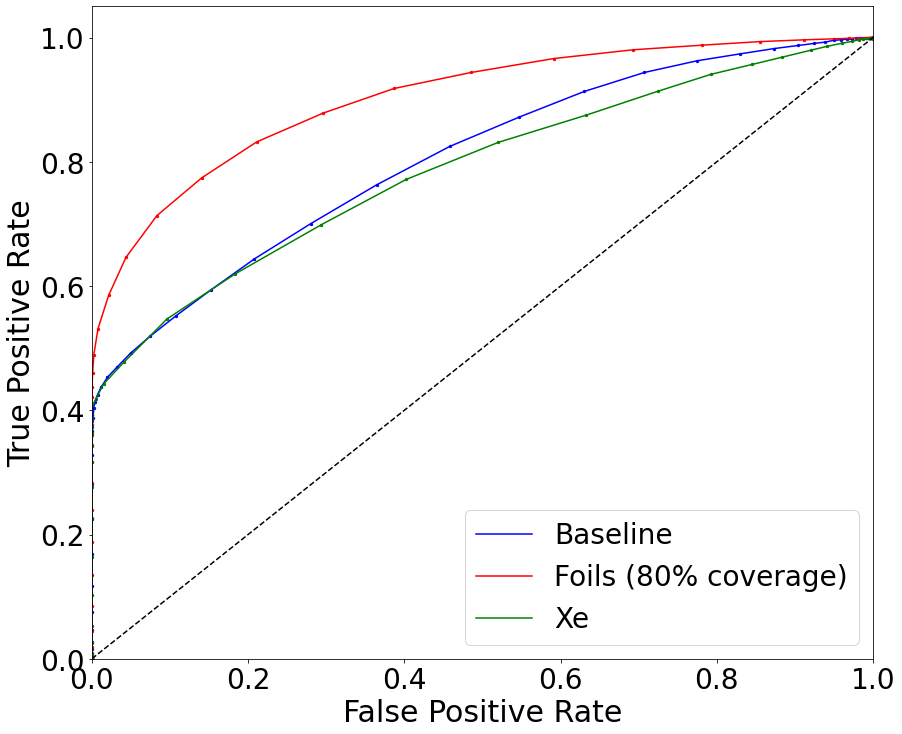

In [5]:
plt.figure(figsize=(14,12))

x=np.arange(0,1.1,0.1)

plt.scatter(bkg_cut_bs, sig_cut_bs, s = 22, marker='.', color='blue')
plt.plot(bkg_cut_bs, sig_cut_bs, color='blue', label='Baseline')

plt.scatter(bkg_cut_foils, sig_cut_foils, s = 22, marker='.', color='red')
plt.plot(bkg_cut_foils, sig_cut_foils, color='red', label='Foils (80% coverage)')

plt.scatter(bkg_cut_xe, sig_cut_xe, s = 22, marker='.', color='green')
plt.plot(bkg_cut_xe, sig_cut_xe, color='green', label='Xe')

plt.plot(x, x, color='black', linestyle='dashed')

plt.ylabel('True Positive Rate', fontsize=30)
plt.xlabel(r'False Positive Rate', fontsize=30)

#plt.title(r'${}^{40} Ar(\alpha, \gamma), ES\ {}^{8} B$', fontsize=18)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.ylim(0,1.05)
plt.xlim(0,1)
plt.legend(fontsize=28)  #, frameon=False)

plt.savefig('../figures/ROC_curve.png', bbox_inches='tight')

plt.show()

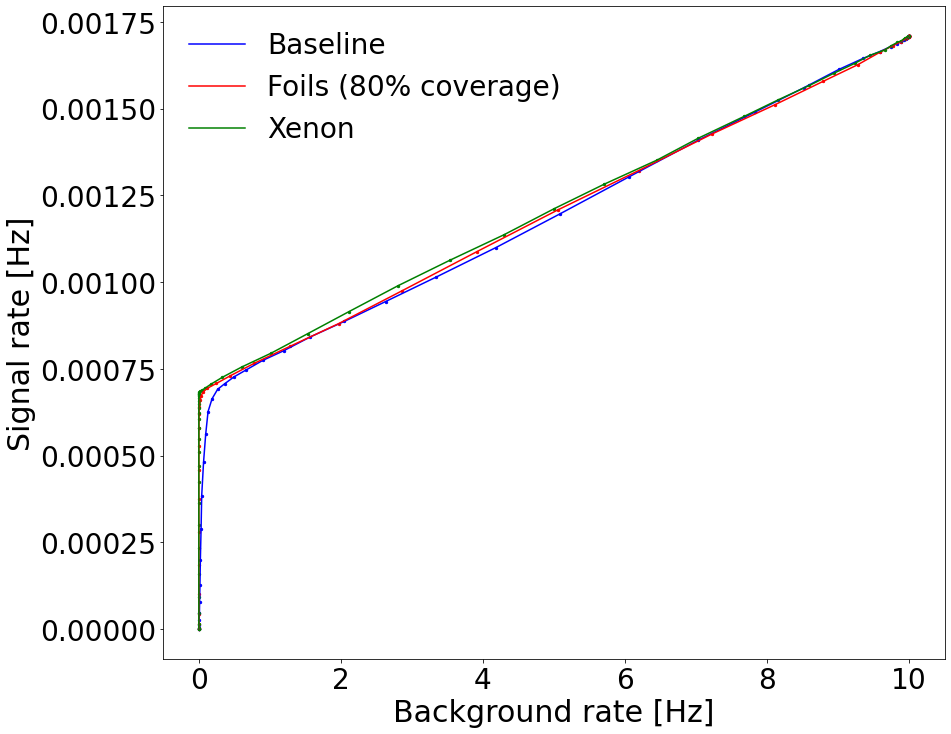

In [5]:
plt.figure(figsize=(14,12))

plt.scatter(bkg_cut_bs*10**8/(10**7), sig_cut_bs*26700*0.64/(10**7), s = 22, marker='.', color='blue')
plt.plot(bkg_cut_bs*10**8/(10**7), sig_cut_bs*26700*0.64/(10**7), color='blue', label='Baseline')

plt.scatter(bkg_cut_foils*10**8/(10**7), sig_cut_foils*26700*0.64/(10**7), s = 22, marker='.', color='red')
plt.plot(bkg_cut_foils*10**8/(10**7), sig_cut_foils*26700*0.64/(10**7), color='red', label='Foils (80% coverage)')

plt.scatter(bkg_cut_xe*10**8/(10**7), sig_cut_xe*26700*0.64/(10**7), s = 22, marker='.', color='green')
plt.plot(bkg_cut_xe*10**8/(10**7), sig_cut_xe*26700*0.64/(10**7), color='green', label='Xenon')

plt.ylabel('Signal rate [Hz]', fontsize=30)
plt.xlabel(r'Background rate [Hz]', fontsize=30)

#plt.title(r'${}^{40} Ar(\alpha, \gamma), ES\ {}^{8} B$', fontsize=18)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
#plt.ylim(0,1.05)
#plt.xlim(0,1)
plt.legend(fontsize=28, frameon=False)

plt.savefig('../figures/ROC_curve_Hz.png', bbox_inches='tight')

plt.show()